In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Directory containing the output files
output_dir = './'

# List to store DataFrame objects for each simulation
dfs = []

# Iterate over each output file
for file in os.listdir(output_dir):
    if file.endswith('.txt'):
        # Extract width from filename
        width = file.split('.')[0].split('_')[-1]  # Assuming filename format is 'output_width_{width}.txt'
        
        # Read the data into a DataFrame
        file_path = os.path.join(output_dir, file)
        df = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None,
                         names=['v-sweep','abs(V(alim))','V(drain)', 'V(gate)', 'V(source)', 'V(body)',
                                'I(Vd)', 'I(Vg)', 'I(Vs)', 'I(Vb)'])
        # Add 'W' column to DataFrame
        df['W'] = width
        dfs.append(df)

# Concatenate all DataFrames
all_data = pd.concat(dfs)

In [3]:
all_data

,v-sweep,abs(V(alim)),V(drain),V(gate),V(source),V(body),I(Vd),I(Vg),I(Vs),I(Vb),W
0,25.0,0.00,1.1,0.00,1.1,0.0,-0.003836,1.473520e-07,-0.003836,0.007671,360n
1,25.0,0.05,1.1,0.05,1.1,0.0,-0.003836,1.223854e-07,-0.003836,0.007671,360n
2,25.0,0.10,1.1,0.10,1.1,0.0,-0.003835,1.017374e-07,-0.003835,0.007671,360n
3,25.0,0.15,1.1,0.15,1.1,0.0,-0.003835,8.432502e-08,-0.003835,0.007671,360n
4,25.0,0.20,1.1,0.20,1.1,0.0,-0.003835,6.949478e-08,-0.003835,0.007671,360n
...,...,...,...,...,...,...,...,...,...,...,...
18,25.0,0.90,1.1,0.90,1.1,0.0,-0.003539,5.286704e-11,-0.003539,0.007077,180n
19,25.0,0.95,1.1,0.95,1.1,0.0,-0.003539,-1.154987e-11,-0.003539,0.007077,180n
20,25.0,1.00,1.1,1.00,1.1,0.0,-0.003539,-1.483240e-10,-0.003539,0.007077,180n
21,25.0,1.05,1.1,1.05,1.1,0.0,-0.003539,-1.261730e-09,-0.003539,0.007077,180n


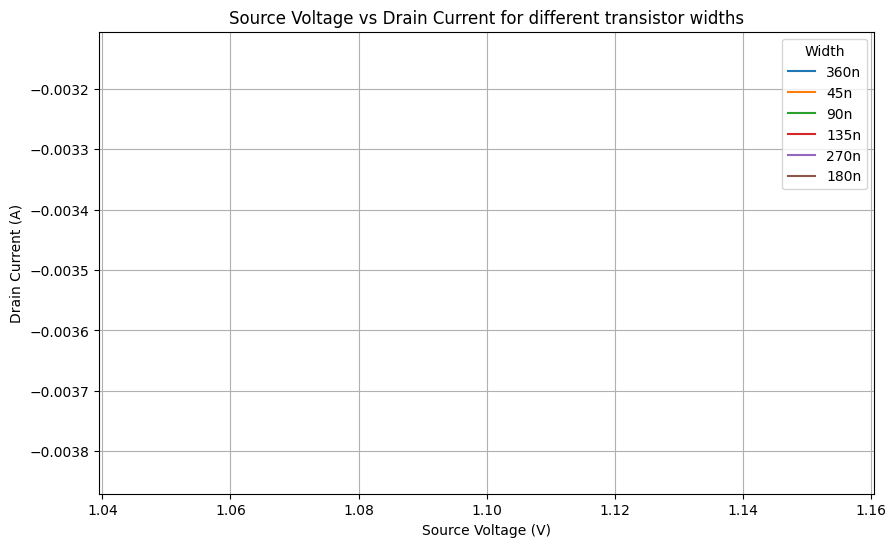

In [4]:
# Plotting V(source) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(source)', y='I(Vd)', hue='W')
plt.xlabel('Source Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.title('Source Voltage vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

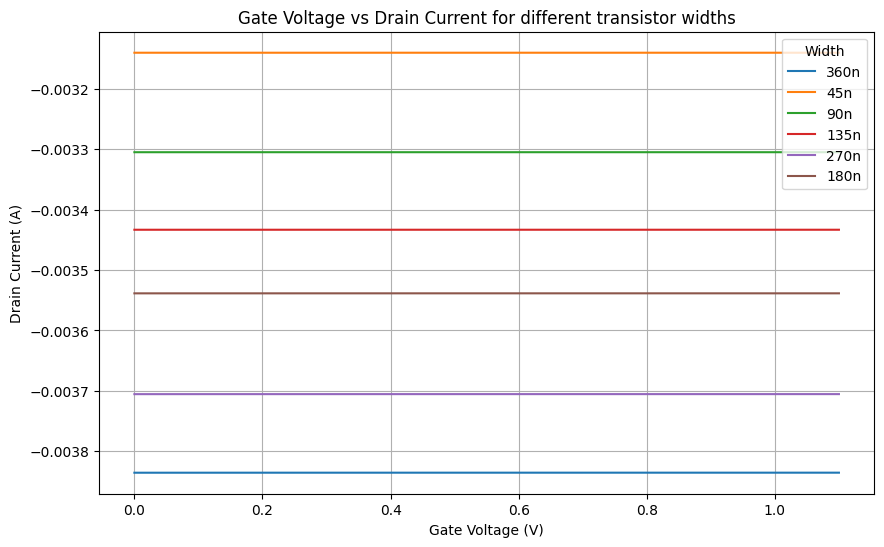

In [5]:
# Plotting V(gate) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(gate)', y='I(Vd)', hue='W')
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.title('Gate Voltage vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

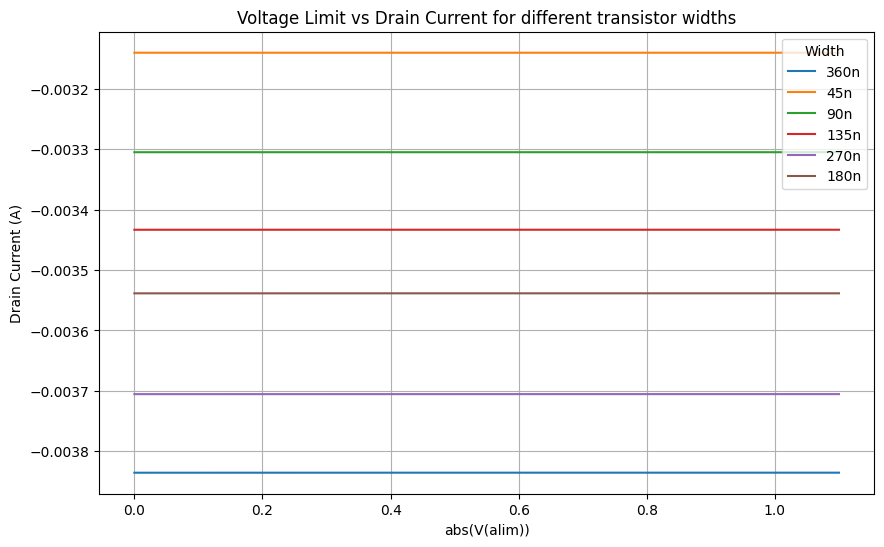

In [6]:
# Plotting abs(V(alim)) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='abs(V(alim))', y='I(Vd)', hue='W')
plt.xlabel('abs(V(alim))')
plt.ylabel('Drain Current (A)')
plt.title('Voltage Limit vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

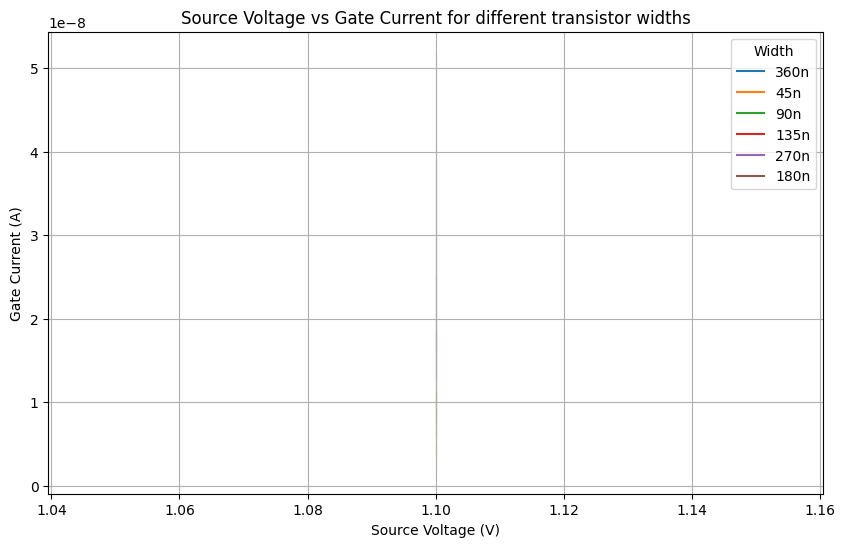

In [7]:
# Plotting V(source) vs I(Vg) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(source)', y='I(Vg)', hue='W')
plt.xlabel('Source Voltage (V)')
plt.ylabel('Gate Current (A)')
plt.title('Source Voltage vs Gate Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()